In [40]:
from sklearn import linear_model
import numpy as np
import pandas as pd
x_train=pd.read_csv('../X_train.csv', sep=',')
y_train=pd.read_csv('../y_train.csv', sep=',')
x_test=pd.read_csv('../X_test.csv', sep=',')


In [41]:
# Scale data

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_x.fit(x_train)  # Don't cheat - fit only on training data
x_train = scaler_x.transform(x_train)
x_test = scaler_x.transform(x_test)  # apply same transformation to test data

scaler_y = StandardScaler()
scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)

columns = ["MYCT", "MMIN", "MMAX", "CACH", "CHMIN", "CHMAX"]
x_train = pd.DataFrame(x_train, columns=columns)
x_test = pd.DataFrame(x_test, columns=columns)
columns = ["Id", "PRP"]
y_train = pd.DataFrame(y_train, columns=columns)
print(x_train.mean(axis = 0))
print(x_test.mean(axis = 0))
print(y_train.mean(axis = 0))
print(x_train.std(axis = 0))
print(x_test.std(axis = 0))
print(y_train.std(axis = 0))

MYCT    -2.643388e-18
MMIN     5.352861e-17
MMAX    -8.921435e-17
CACH    -3.568574e-17
CHMIN    4.493760e-17
CHMAX   -5.088522e-17
dtype: float64
MYCT    -0.035296
MMIN    -0.030850
MMAX     0.095726
CACH     0.110052
CHMIN    0.347093
CHMAX    0.417453
dtype: float64
Id    -7.137148e-17
PRP   -4.460718e-17
dtype: float64
MYCT     1.00299
MMIN     1.00299
MMAX     1.00299
CACH     1.00299
CHMIN    1.00299
CHMAX    1.00299
dtype: float64
MYCT     0.838634
MMIN     0.908479
MMAX     1.118306
CACH     1.226731
CHMIN    1.507469
CHMAX    1.845120
dtype: float64
Id     1.00299
PRP    1.00299
dtype: float64


In [71]:
# Initial empty prediction dataframe
index = np.arange(len(x_test.iloc[:,0]))
columns = ["Id"]
rows = len(x_test.iloc[:,0])
data = np.arange(rows, dtype=int)
prediction = pd.DataFrame(data, columns=columns)

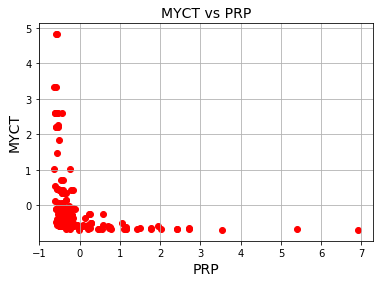

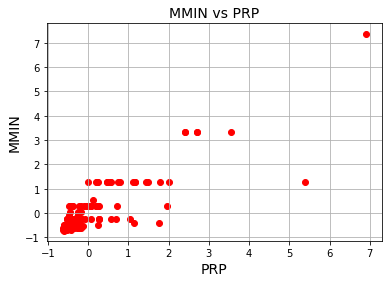

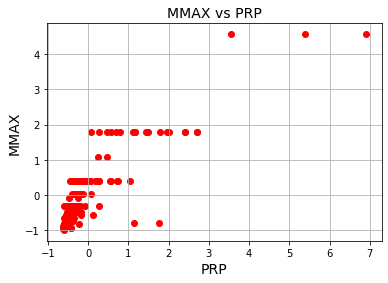

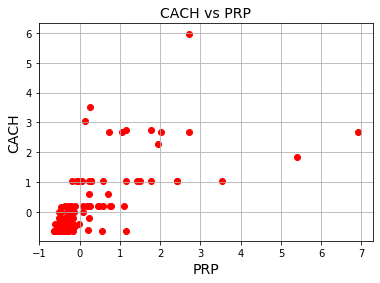

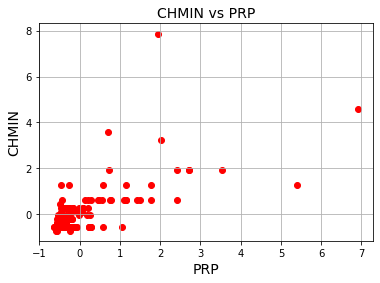

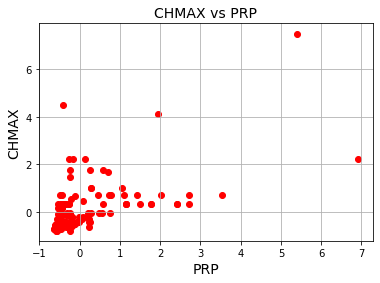

In [43]:
# Checking for linearity

import matplotlib.pyplot as plt

plt.scatter(y_train['PRP'], x_train["MYCT"], color='red')
plt.title('MYCT vs PRP', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('MYCT', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(y_train['PRP'], x_train["MMIN"], color='red')
plt.title('MMIN vs PRP', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('MMIN', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(y_train['PRP'], x_train["MMAX"], color='red')
plt.title('MMAX vs PRP', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('MMAX', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(y_train['PRP'], x_train["CACH"], color='red')
plt.title('CACH vs PRP', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('CACH', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(y_train['PRP'], x_train["CHMIN"], color='red')
plt.title('CHMIN vs PRP', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('CHMIN', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(y_train['PRP'], x_train["CHMAX"], color='red')
plt.title('CHMAX vs PRP', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('CHMAX', fontsize=14)
plt.grid(True)
plt.show()

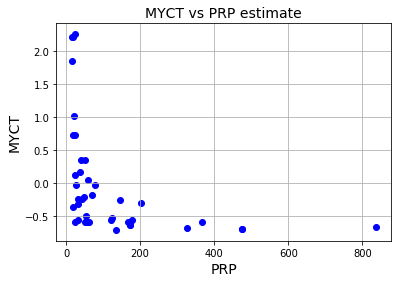

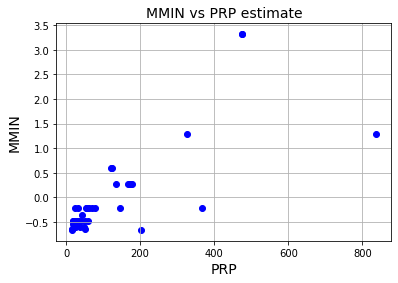

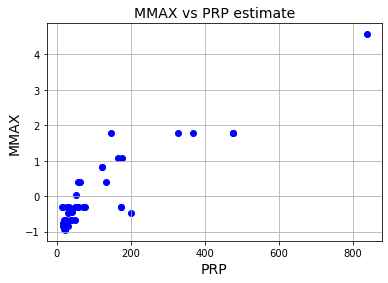

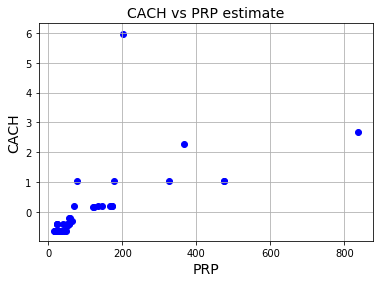

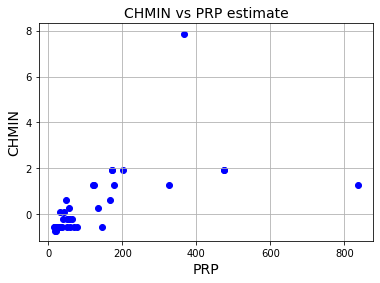

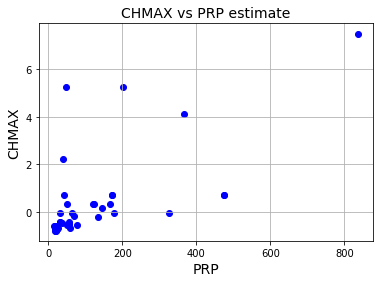

In [110]:
# Estimated PRP

plt.scatter(prediction['PRP'], x_test["MYCT"], color='blue')
plt.title('MYCT vs PRP estimate', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('MYCT', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(prediction['PRP'], x_test["MMIN"], color='blue')
plt.title('MMIN vs PRP estimate', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('MMIN', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(prediction['PRP'], x_test["MMAX"], color='blue')
plt.title('MMAX vs PRP estimate', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('MMAX', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(prediction['PRP'], x_test["CACH"], color='blue')
plt.title('CACH vs PRP estimate', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('CACH', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(prediction['PRP'], x_test["CHMIN"], color='blue')
plt.title('CHMIN vs PRP estimate', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('CHMIN', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(prediction['PRP'], x_test["CHMAX"], color='blue')
plt.title('CHMAX vs PRP estimate', fontsize=14)
plt.xlabel('PRP', fontsize=14)
plt.ylabel('CHMAX', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# Linear least squares
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train["PRP"])

#data = np.zeros(rows) + reg.intercept_
#for i in range(len(reg.coef_)):
#    data += reg.coef_[i]*x_test.iloc[:,i]
#prediction["PRP"] = np.around(data).astype(int)
prediction["PRP"] = np.around(reg.predict(x_test)).astype(int)
print(prediction.to_string(index=False))
prediction.to_csv("lls_results.csv", index=False)


In [ ]:
# Linear least squares w/o MYCT
reg = linear_model.LinearRegression()
reg.fit(x_train.iloc[:,1:], y_train["PRP"])

#data = np.zeros(rows) + reg.intercept_
#for i in range(len(reg.coef_)):
#    data += reg.coef_[i]*x_test.iloc[:,i]
#prediction["PRP"] = np.around(data).astype(int)
prediction["PRP"] = np.around(reg.predict(x_test.iloc[:,1:])).astype(int)
print(prediction.to_string(index=False))
prediction.to_csv("lls_wo_results.csv", index=False)


In [16]:
# Ridge Regression
reg = linear_model.RidgeCV()
reg.fit(x_train, y_train["PRP"])
print(reg.score(x_train, y_train["PRP"]))

prediction["PRP"] = np.around(reg.predict(x_test)).astype(int)
print(prediction.to_string(index=False))
prediction.to_csv("rr_results.csv", index=False)


0.8843164190775485
 Id  PRP
  0   93
  1  200
  2   29
  3  427
  4   39
  5    5
  6   71
  7  -16
  8   57
  9   -1
 10  167
 11    3
 12  300
 13   26
 14  185
 15   14
 16   22
 17   21
 18   14
 19  168
 20   77
 21  -14
 22   54
 23   23
 24  200
 25  132
 26   87
 27  461
 28  -13
 29  356
 30  147
 31    6
 32   65
 33  204
 34   61
 35  680
 36    5
 37  461
 38   25
 39   19
 40  147


In [35]:
# Kernel Ridge Regression
from sklearn.kernel_ridge import KernelRidge

reg = KernelRidge(alpha=1.0, kernel="rbf", gamma=10000)
reg.fit(x_train, y_train["PRP"])

prediction["PRP"] = np.around(reg.predict(x_test)).astype(int)
print(prediction.to_string(index=False))
prediction.to_csv("krr_results.csv", index=False)

 Id  PRP
  0    0
  1    0
  2   12
  3    0
  4    0
  5    0
  6   30
  7    0
  8    0
  9    0
 10    0
 11    0
 12    0
 13    0
 14    0
 15    0
 16    0
 17    0
 18    0
 19    0
 20    0
 21    0
 22    0
 23    0
 24    0
 25    0
 26    0
 27    0
 28    0
 29    0
 30    0
 31    0
 32    0
 33    0
 34    0
 35    0
 36    0
 37    0
 38    0
 39    0
 40    0


In [ ]:
# Polynomial Ridge Regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=1)
X_ = poly.fit_transform(x_train)
predict_ = poly.fit_transform(x_test)

clf = linear_model.RidgeCV()
clf.fit(X_, y_train["PRP"])
print(clf.predict(predict_))


prediction["PRP"] = np.around(reg.predict(x_test)).astype(int)
print(prediction.to_string(index=False))
prediction.to_csv("rr_results.csv", index=False)


In [80]:
# Ridge Regression w/o first col
reg = linear_model.RidgeCV()
reg.fit(x_train.iloc[:,1:], y_train["PRP"])
print(reg.score(x_train.iloc[:,1:], y_train["PRP"]))

index = np.arange(len(x_test.iloc[:,0]))
columns = ["Id"]
rows = len(x_test.iloc[:,0])
data = np.arange(rows, dtype=int)
rr = pd.DataFrame(data, columns=columns)

rr["PRP"] = reg.predict(x_test.iloc[:,1:])
prp = np.around(scaler_y.inverse_transform(rr)[:,1]).astype(int)
prediction["PRP"] = prp
print(prediction.to_string(index=False))
prediction.to_csv("rr_scaled_wo_results.csv", index=False)


0.879325171290678
 Id  PRP
  0   88
  1  203
  2   10
  3  437
  4   48
  5   -1
  6   79
  7   -4
  8   55
  9    2
 10  163
 11    0
 12  299
 13   29
 14  188
 15   19
 16   17
 17   32
 18   22
 19  168
 20   78
 21   -5
 22   63
 23    8
 24  203
 25  139
 26   94
 27  448
 28   -9
 29  349
 30  155
 31  -12
 32   68
 33  208
 34   65
 35  654
 36  -13
 37  448
 38   34
 39   26
 40  155


In [103]:
# Ridge Regression
reg = linear_model.RidgeCV(alphas=np.arange(1,2,50000), fit_intercept=True)
reg.fit(x_train, y_train["PRP"])
print(reg.score(x_train, y_train["PRP"]))

index = np.arange(len(x_test.iloc[:,0]))
columns = ["Id"]
rows = len(x_test.iloc[:,0])
data = np.arange(rows, dtype=int)
rr = pd.DataFrame(data, columns=columns)

rr["PRP"] = reg.predict(x_test)
prp = np.around(scaler_y.inverse_transform(rr)[:,1]).astype(int)
prediction["PRP"] = prp
print(prediction.to_string(index=False))
prediction.to_csv("rr_scaled_results.csv", index=False)


0.8843057292359112
 Id  PRP
  0   93
  1  201
  2   29
  3  429
  4   40
  5    5
  6   71
  7  -15
  8   57
  9   -1
 10  167
 11    3
 12  300
 13   26
 14  185
 15   15
 16   22
 17   22
 18   15
 19  168
 20   77
 21  -14
 22   54
 23   23
 24  200
 25  132
 26   87
 27  460
 28  -13
 29  356
 30  148
 31    6
 32   65
 33  204
 34   61
 35  678
 36    5
 37  460
 38   25
 39   19
 40  148


In [174]:
# rfr
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, max_depth=10)
reg.fit(x_train, y_train["PRP"])

print(reg.score(x_train, y_train["PRP"]))

index = np.arange(len(x_test.iloc[:,0]))
columns = ["Id"]
rows = len(x_test.iloc[:,0])
data = np.arange(rows, dtype=int)
rr = pd.DataFrame(data, columns=columns)

rr["PRP"] = reg.predict(x_test)
prp = np.around(scaler_y.inverse_transform(rr)[:,1]).astype(int)
prediction["PRP"] = prp
print(prediction.to_string(index=False))
prediction.to_csv("rfr_scaled_results.csv", index=False)

0.9754922151865371
 Id  PRP
  0   40
  1  124
  2   16
  3  358
  4   52
  5   19
  6   58
  7   26
  8   52
  9   35
 10   61
 11   18
 12  317
 13   59
 14  169
 15   34
 16   23
 17   51
 18   31
 19  149
 20   86
 21   18
 22   55
 23   20
 24  127
 25  134
 26   65
 27  514
 28   26
 29  176
 30  168
 31   17
 32   68
 33  173
 34   43
 35  761
 36   19
 37  514
 38   28
 39   38
 40  168


In [ ]:
# Bayesian ridge regression
reg = linear_model.BayesianRidge(compute_score=True)
reg.fit(x_train, y_train["PRP"])
print(reg.score(x_train, y_train["PRP"]))

prediction["PRP"] = np.around(reg.predict(x_test)).astype(int)
print(prediction.to_string(index=False))
prediction.to_csv("brr_results.csv", index=False)

In [49]:
reg = linear_model.LassoCV(cv=5)
reg.fit(x_train, y_train["PRP"])

a = np.around(reg.predict(x_test)).astype(int)
prediction["PRP"] = a.clip(min=6)
print(prediction.to_string(index=False))
prediction.to_csv("lasso_results.csv", index=False)


 Id  PRP
  0   19
  1  204
  2   34
  3  224
  4   63
  5   19
  6  117
  7    6
  8   63
  9   11
 10   11
 11   13
 12  324
 13   46
 14  204
 15   46
 16   36
 17   46
 18    6
 19  224
 20   63
 21    6
 22   63
 23   36
 24  204
 25  150
 26  117
 27  456
 28    6
 29   20
 30   96
 31    6
 32   63
 33  204
 34   43
 35  539
 36    6
 37  456
 38   49
 39   46
 40   96


In [ ]:
reg = linear_model.ElasticNet()
reg.fit(x_train, y_train["PRP"])

prediction["PRP"] = np.around(reg.predict(x_test)).astype(int)
print(prediction.to_string(index=False))
prediction.to_csv("mtl_results.csv", index=False)


In [ ]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_lin.fit(x_train, y_train["PRP"])
print(svr_lin.predict(x_test))

#prediction.to_csv("linearSVR_results.csv", index=False)